In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_excel('CANADA_DATA_EDA.xlsx')

df.tail(10)
prediction_data = pd.read_csv('FUTURE_DATA_optimistic.csv')
prediction_data.head(10)
pessimistic_data = pd.read_excel('FUTURE_DATA_Pessimistic.xlsx')

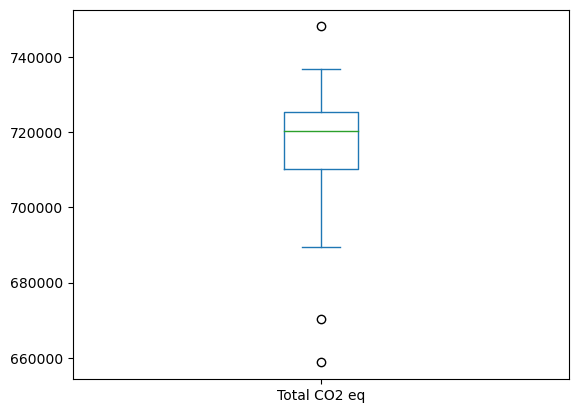

In [333]:
df['Total CO2 eq'].plot(kind='box') 
plt.show()

In [60]:
df.isnull().sum()

Region                  0
Year                    0
CO2                     0
CH4                     0
CH4 (CO2eq)             0
N2O                     0
N2O (CO2eq)             0
CO2eq                   0
Mean Temp               0
Mean Temp Max           0
Mean Temp Min           0
Mean Temp Dep           0
Max Temp Dep            0
Min Temp Dep            0
Average_Tree_Loss_ha    0
dtype: int64

In [227]:
df.dtypes

Year                   int64
Total CO2 eq         float64
Mean Temp            float64
Mean Temp Max        float64
Mean Temp Min        float64
Average Tree Loss    float64
Average CO2 eq       float64
dtype: object

In [79]:
df.isnull().values.any()


False

In [95]:
df[["Total CO2 eq",'Mean Temp Max','Average Tree Loss']].corr()

,Total CO2 eq,Mean Temp Max,Average Tree Loss
Total CO2 eq,1.000000,-0.168738,0.577736
Mean Temp Max,-0.168738,1.000000,-0.024939
Average Tree Loss,0.577736,-0.024939,1.000000


In [96]:
corr_matrix=df[["Total CO2 eq",'Mean Temp Max','Average Tree Loss']].corr()

<Axes: >

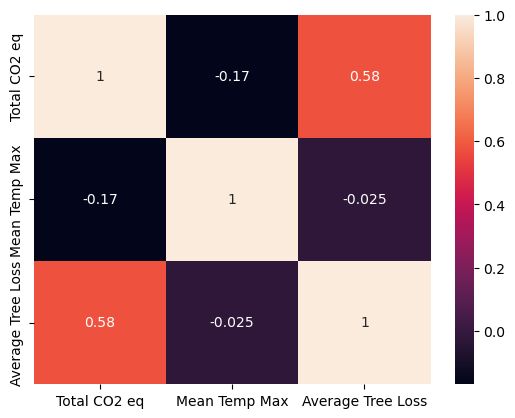

In [91]:
sns.heatmap(corr_matrix, annot = True)

In [7]:
y = df['Mean Temp Max']
x = df[['Year','Total CO2 eq','Average Tree Loss']]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,   random_state = 549)

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
rf = RandomForestRegressor(n_estimators=250, criterion='squared_error', random_state = 549)

In [11]:
rfmodel = rf.fit(x_train,y_train)

In [12]:
ytest_pred = rfmodel.predict(x_test)
ytest_pred

array([14.9203425 , 16.58472723, 16.68110192, 15.79747795, 16.56877385])

In [13]:
mse = mean_squared_error(y_test, ytest_pred)
mae = mean_absolute_error(y_test, ytest_pred)
r2 = r2_score(y_test, ytest_pred)

print ("RANDOM FOREST MODEL")
print("Mean square error : ", mse)
print("Mean absolute error :", mae)

RANDOM FOREST MODEL
Mean square error :  0.20259192261844924
Mean absolute error : 0.32227634994339277


In [722]:
##OPTIMISTIC PREDICTION USING RANDOM FOREST
y_pred_random = rfmodel.predict(prediction_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_random

array([16.77477348, 16.75436887, 16.71155737, 16.70970473, 16.70970473,
       16.70970473, 16.70970473, 16.70970473, 16.70970473, 16.70970473,
       16.70970473, 16.70970473, 16.70970473, 16.70970473, 16.70970473,
       16.70970473, 16.70970473, 16.70970473, 16.70970473, 16.70970473])

In [723]:
##PESSIMISTIC PREDICTION USING RANDOM FOREST
y_pred_pess_rd = rfmodel.predict(pessimistic_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_pess_rd

array([16.77477348, 16.35301693, 16.37477124, 16.37477124, 16.37477124,
       16.37477124, 16.37477124, 16.37477124, 16.37477124, 16.37477124,
       16.37477124, 16.37477124, 16.37477124, 16.37477124, 16.37477124,
       16.37477124, 16.37477124, 16.37477124, 16.37477124, 16.37477124])

In [3]:
initial_CO2_emission = 670427.686551  # value for 2023
initial_tree_loss = 178009.173077  # value for 2023

scenarios = ['optimistic', 'baseline', 'pessimistic']

future_data = pd.DataFrame({
    'Year': range(2025, 2045),
})

for scenario in scenarios:
    if scenario == 'pessimistic':
        # 10% increase each year for CO2 emissions and tree loss
        future_data[f'{scenario}Total CO2 eq'] = [initial_CO2_emission * 1.1 ** (year - 2025) for year in range(2025, 2045)]
        future_data[f'{scenario}Average Tree Loss'] = [initial_tree_loss * 1.1 ** (year - 2025) for year in range(2025, 2045)]
    elif scenario == 'optimistic':
        # 10% decrease each year for CO2 emissions and tree loss
        future_data[f'{scenario}Total CO2 eq'] = [initial_CO2_emission * 0.9 ** (year - 2025) for year in range(2025, 2045)]
        future_data[f'{scenario}Average Tree Loss'] = [initial_tree_loss * 0.9 ** (year - 2025) for year in range(2025, 2045)]
    elif scenario == 'baseline':
        # Initial values maintained for the baseline scenario
        future_data[f'{scenario}Total CO2 eq'] = initial_CO2_emission
        future_data[f'{scenario}Average Tree Loss'] = initial_tree_loss
future_data.head(5)


,Year,optimisticTotal CO2 eq,optimisticAverage Tree Loss,baselineTotal CO2 eq,baselineAverage Tree Loss,pessimisticTotal CO2 eq,pessimisticAverage Tree Loss
0,2025,670427.686551,178009.173077,670427.686551,178009.173077,670427.686551,178009.173077
1,2026,603384.917896,160208.255769,670427.686551,178009.173077,737470.455206,195810.090385
2,2027,543046.426106,144187.430192,670427.686551,178009.173077,811217.500727,215391.099423
3,2028,488741.783496,129768.687173,670427.686551,178009.173077,892339.250799,236930.209365
4,2029,439867.605146,116791.818456,670427.686551,178009.173077,981573.175879,260623.230302


In [14]:
y = df['Mean Temp Max']
x = df[['Year','Total CO2 eq','Average Tree Loss']]

In [15]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2,   random_state = 45)

In [16]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=123)

In [17]:
dtmodel = dt.fit(x_train1,y_train1)

In [18]:
predicted = dtmodel.predict(x_test1)
predicted

array([17.29807692, 15.91858974, 16.80448718, 15.71719114, 17.19038462])

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print ("DECISION TREE MODEL")
print("Mean square error : ", mse)
print("Mean absolute error :", mae)

DECISION TREE MODEL
Mean square error :  1.2994472176595584
Mean absolute error : 0.76662832688332


In [765]:
##OPTIMISTIC PREDICTION USING DECISION TREE
y_pred_random_dt = dtmodel.predict(prediction_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_random_dt

array([16.80448718, 16.80448718, 16.80448718, 16.80448718, 16.80448718,
       16.80448718, 16.80448718, 16.80448718, 16.80448718, 16.80448718,
       16.80448718, 16.80448718, 16.80448718, 16.80448718, 16.80448718,
       16.80448718, 16.80448718, 16.80448718, 16.80448718, 16.80448718])

In [766]:
##PESSIMISTIC PREDICTION USING DECISION TREE
y_pred_pess_dt = dtmodel.predict(pessimistic_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_pess_dt

array([16.80448718, 16.53183717, 16.53183717, 16.53183717, 16.53183717,
       16.53183717, 16.53183717, 16.53183717, 16.53183717, 16.53183717,
       16.53183717, 16.53183717, 16.53183717, 16.53183717, 16.53183717,
       16.53183717, 16.53183717, 16.53183717, 16.53183717, 16.53183717])

In [20]:
y2 = df['Mean Temp Max']
x2 = df[['Year','Total CO2 eq','Average Tree Loss']]
df.head(2)

,Year,Total CO2 eq,Mean Temp,Mean Temp Max,Mean Temp Min,Average Tree Loss,Average CO2 eq
0,2001,710171.835876,0.861235,15.717191,-13.701690,99938.221154,33817.70647
1,2002,715489.771136,0.225641,15.590385,-13.972436,178205.971154,34070.94148


In [21]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2,   random_state = 45)

In [22]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

In [24]:
lnmodel = ln.fit(x_train2,y_train2)

In [25]:
predicted_temp = lnmodel.predict(x_test2)
predicted_temp

array([15.95121277, 16.46294943, 17.22267456, 14.98228346, 16.47846967])

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predicted_temp)
mae = mean_absolute_error(y_test, predicted_temp)
r2 = r2_score(y_test, predicted_temp)

print ("LINEAR REGRESSION MODEL")
print("Mean square error : ", mse)
print("Mean absolute error :", mae)

LINEAR REGRESSION MODEL
Mean square error :  0.8194216776717497
Mean absolute error : 0.7613855605799056


In [392]:
##OPTIMISTIC PREDICTION USING LINEAR
y_pred_pess_ln = lnmodel.predict(pessimistic_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_pess_ln


array([17.57338553, 17.40396191, 17.20882816, 16.98541326, 16.73088909,
       16.44214473, 16.11575816, 15.74796516, 15.33462509, 14.87118323,
       14.35262941, 13.77345244, 13.12759   , 12.40837353, 11.60846765,
       10.71980341,  9.73350496,  8.6398089 ,  7.42797545,  6.08619089])

In [393]:
##PESSIMISTIC PREDICTION USING LINEAR
y_pred_random_ln = lnmodel.predict(prediction_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_random_ln

array([17.57338553, 17.91816463, 18.2372336 , 18.53316345, 18.80826808,
       19.06463003, 19.30412355, 19.5284355 , 19.73908403, 19.93743547,
       20.12471955, 20.302043  , 20.47040187, 20.63069263, 20.78372209,
       20.93021638, 21.07082901, 21.20614815, 21.33670316, 21.46297044])

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

y = df['Mean Temp Max']
x = df[['Year','Total CO2 eq','Average Tree Loss']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Robust Regression (Huber Regressor)
huber_regressor = HuberRegressor()
huber_regressor.fit(X_train, y_train)
y_pred_huber = huber_regressor.predict(X_test)

svr = SVR(kernel='linear', epsilon=1.5)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test,  y_pred_huber)
mae = mean_absolute_error(y_test,  y_pred_huber)
r2 = r2_score(y_test, predicted_temp)

mse1 = mean_squared_error(y_test,  y_pred_svr)
mae1 = mean_absolute_error(y_test,  y_pred_svr)
r21 = r2_score(y_test, predicted_temp)

print ("HUBER REGRESSION MODEL")
print("Mean square error : ", mse)
print("Mean absolute error :", mae)
print("")
print ("SUPPORT VECTOR REGRESSION MODEL")
print("Mean square error : ", mse1)
print("Mean absolute error :", mae1)

HUBER REGRESSION MODEL
Mean square error :  1.2568601496852676
Mean absolute error : 0.7948285821657791

SUPPORT VECTOR REGRESSION MODEL
Mean square error :  1.875291626185589
Mean absolute error : 1.166300361029166


In [370]:
##OPTIMISTIC PREDICTION USING HUBER
y_pred_huber = huber_regressor.predict(prediction_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_huber

array([17.09338338, 18.0216922 , 18.85846628, 19.61285909, 20.29310876,
       20.9066296 , 21.4600945 , 21.95950905, 22.41027829, 22.81726675,
       23.1848525 , 23.51697581, 23.81718294, 24.08866549, 24.33429593,
       24.55665946, 24.75808279, 24.94065992, 25.10627548, 25.25662562])

In [731]:
##OPTIMISTIC PREDICTION USING HUBER
y_pred_svr = svr.predict(prediction_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_svr

array([18.27396189, 20.69320743, 22.87053396, 24.83013337, 26.59377838,
       28.18106443, 29.60962741, 30.89533963, 32.05248616, 33.09392358,
       34.03122279, 34.87479762, 35.63402051, 36.31732665, 36.9323077 ,
       37.48579619, 37.98394137, 38.43227757, 38.83578569, 39.19894853])

In [732]:
##PESSIMITIC PREDICTION USING SVR
pessimistic_data = pd.read_excel('FUTURE_DATA_Pessimistic.xlsx')
y_pred_pess = huber_regressor.predict(pessimistic_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_pess

array([ 17.09338338,  16.19099738,  15.19707663,  14.10246767,
        12.89710168,  11.56990294,  10.10868819,   8.50005583,
         6.72926408,   4.78009702,   2.63471712,   0.27350308,
        -2.3251285 ,  -5.18491938,  -8.33198549, -11.79505435,
       -15.60572624, -19.79876146, -24.41239634, -29.48869085])

In [733]:
##PESSIMITIC PREDICTION USING SVR
pessimistic_data = pd.read_excel('FUTURE_DATA_Pessimistic.xlsx')
y_pred_pess_svr = svr.predict(pessimistic_data[['Year', 'Total CO2 eq', 'Average Tree Loss']])
y_pred_pess_svr

array([  18.27396189,   15.8548271 ,   13.19377329,   10.26660856,
          7.04672182,    3.50484088,   -0.39123371,   -4.67692128,
         -9.39118316,  -14.57687675,  -20.28114525,  -26.55584613,
        -33.45802264,  -41.05042233,  -49.40206753,  -58.5888828 ,
        -68.69438512,  -79.81044321,  -92.03811265, -105.48855458])